# Complex Intersection Consolidation

In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

Complete graph for driving.

In [ ]:
G_drive_complex = ox.graph_from_place('Barcelona, Spain', network_type = 'drive',simplify = False)
fig, ax = ox.plot_graph(G_drive_complex, node_color= 'r')

In [ ]:
G_drive = ox.graph_from_place('Barcelona, Spain', network_type = 'drive')
fig, ax = ox.plot_graph(G_drive, node_color = 'r')

In [ ]:
G_drive_proj = ox.project_graph(G_drive)

In [ ]:
# Consolidate intersections which have more than one node with in 15 m
intersections = ox.consolidate_intersections(G_drive_proj, rebuild_graph=False, tolerance=15, dead_ends=False)

In [ ]:
print(len(intersections))
print(len(G_drive))

In [ ]:
# To apply that into our graph we must set the variable rebuild_graph to True
G_drive_simplified = ox.consolidate_intersections(G_drive_proj, rebuild_graph=True, tolerance=15, dead_ends=False)
len(G_drive_simplified)

In [ ]:
fig, ax = ox.plot_graph(G_drive_simplified, node_color='w')

In [ ]:
# plot the simplified network and highlight any self-loop edges
loops = [edge[0] for edge in nx.selfloop_edges(G_drive_simplified)]
nc = ['r' if node in loops else 'y' for node in G_drive_simplified.nodes()]
fig, ax = ox.plot_graph(G_drive_simplified, node_color=nc)

## Same Process in a zoomed area

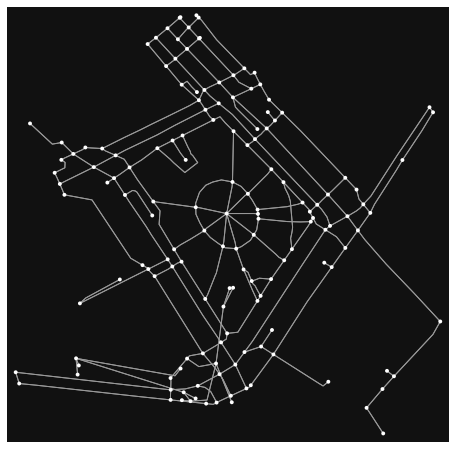

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
G_zoom_walk = ox.graph_from_address('Plaça Catalunya, Barcelona, Spain', dist = 200, network_type = 'walk')
ox.plot_graph(G_zoom_walk)

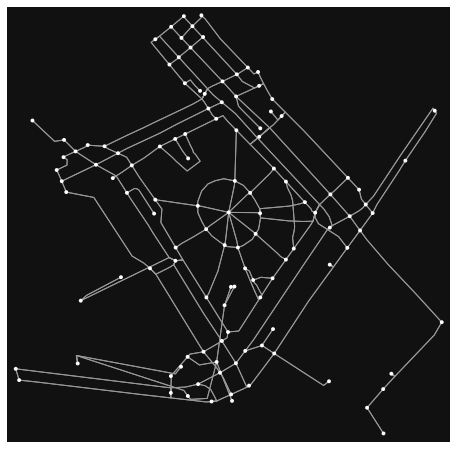

In [5]:
# Simplify the graph
G_zoom_walk_simp = ox.consolidate_intersections(ox.project_graph(G_zoom_walk), rebuild_graph=True, tolerance=5, dead_ends=True)
ax, fig = ox.plot_graph(G_zoom_walk_simp)


In [31]:
G_zoom_walk_simp.nodes

NodeView((0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, '25-0', '25-1', '3-0', '3-1', '64-0', '64-1', '92-0', '92-1'))

In [7]:
print(len(G_zoom_walk.nodes))
print(len(G_zoom_walk_simp.nodes))

149
117


In [ ]:
nodes, edges = ox.graph_to_gdfs(G_zoom_walk)
edges = edges.dropna(axis=1, how='any') 
edges

In [ ]:
intersections = ox.consolidate_intersections(ox.project_graph(G_zoom_drive), rebuild_graph=False, tolerance=15, dead_ends=False)
intersections

## Try to perform routes

53
29


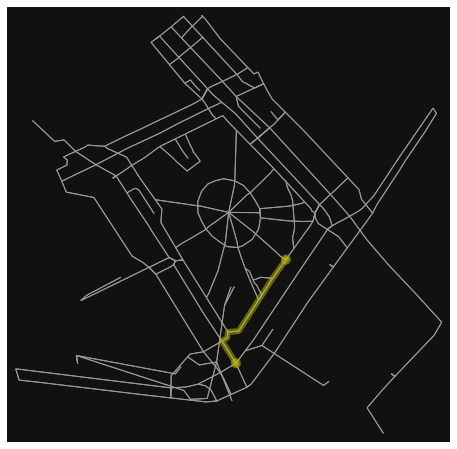

In [29]:
# find the shortest path (by distance) between these nodes then plot it
orig = list(G_zoom_walk_simp)[randint(0,len(G_zoom_walk_simp)-1)]
dest = list(G_zoom_walk_simp)[randint(0,len(G_zoom_walk_simp)-1)]
print(orig)
print(dest)
try:
    route = ox.shortest_path(G_zoom_walk_simp, orig,dest, weight='length')
    fig, ax = ox.plot_graph_route(G_zoom_walk_simp, route, route_color='y', route_linewidth=6, node_size=0)
except:
    print("no path to", dest)
    # Try to get the closest node 
    

### Save and load intersections consolidated


In [ ]:
len(G_zoom_walk_simp)

In [40]:
ox.save_graphml(G_zoom_walk_simp,'../../' + '/BCNgraphs/'+'cheat'+'.graphml', gephi = True)

In [42]:
ox.load_graphml('../../' + '/BCNgraphs/'+'cheat'+'.graphml')

ValueError: invalid literal for int() with base 10: '25-0'